In [57]:
import pandas as pd

In [58]:
import numpy as np

1.Read the dataset into a pandas DataFrame.

In [59]:
data=pd.read_csv("/content/drive/MyDrive/Concept and Technologoies of AI/diabetes_.csv");
print(data.head());

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


2.Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [60]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:

missing_info=data.isnull().sum()/len(data)*100
print(missing_info);


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [62]:
print(data.describe());

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

3.Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [63]:

for column in data.columns:
    if missing_info[column] > 10:
        if data[column].dtype == '':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)
print("Data after processing: ", data.head())
print("Missing values after processing:", data.isnull().sum())


Data after processing:     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Missing values after processing: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcom

4.Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [64]:
x=data.drop(columns=['Outcome']).values
y=data['Outcome'].values

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)


print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


5.• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [65]:
import math

In [66]:
from collections import Counter

In [67]:
def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

In [68]:
def predict(train_X, train_y, test_point, k):
    distances = []
    for i in range(len(train_X)):
        dist = distance(train_X[i], test_point)
        distances.append((dist, train_y[i]))
    distances.sort()  # sort by distance
    neighbors = distances[:k]
    labels = [label for _, label in neighbors]
    return Counter(labels).most_common(1)[0][0]

In [69]:
def predict_all(train_X, train_y, test_X, k):
    return [predict(train_X, train_y, x, k) for x in test_X]

In [70]:
def accuracy(true_y, pred_y):
    correct = 0
    for t, p in zip(true_y, pred_y):
        if t == p:
            correct += 1
    return correct / len(true_y)

In [71]:
try:

    x_test_sample = x_test[:5]
    y_test_sample = y_test[:5]


    predictions = knn_predict(x_test_sample, x_train, y_train, k=3)


    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)


    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


An unexpected error occurred: name 'knn_predict' is not defined


In [72]:
train_X = [[1,2], [2,3], [3,3], [6,5]]
train_y = ['A', 'A', 'B', 'B']

In [73]:
test_X = [[2,2], [5,4]]
test_y = ['A', 'B']

k = 3

In [74]:
predictions = predict_all(train_X, train_y, test_X, k)
print("Predictions:", predictions)
print("Accuracy:", accuracy(test_y, predictions))

Predictions: ['A', 'B']
Accuracy: 1.0


6.Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [75]:
import matplotlib.pyplot as plt


In [76]:
def min_max_scale(X):
    scaled_X = []
    # Transpose X to work column-wise
    for i in range(len(X[0])):
        col = [row[i] for row in X]
        min_val = min(col)
        max_val = max(col)

        scaled_col = [(x - min_val)/(max_val - min_val)
         if max_val != min_val
                      else 0 for x in col]
        for j in range(len(X)):
            if len(scaled_X) < j+1:
                scaled_X.append([])
            scaled_X[j].append(scaled_col[j])
    return scaled_X




In [77]:
train_X = [[1, 200], [2, 300], [3, 250], [6, 400]]
train_y = ['A', 'A', 'B', 'B']

In [78]:
test_X = [[2, 220], [5, 380]]
test_y = ['A', 'B']
k=3

In [79]:
scaled_train_X = min_max_scale(train_X)
scaled_test_X = min_max_scale(test_X)

In [80]:
predictions = predict_all(scaled_train_X, train_y, scaled_test_X, k)

acc = accuracy(test_y, predictions)

print("Scaled Predictions:", predictions)
print("Accuracy with scaled data:", acc)


Scaled Predictions: ['A', 'B']
Accuracy with scaled data: 1.0


7.Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [81]:

train_X = [[1, 200], [2, 300], [3, 250], [6, 400]]
train_y = ['A', 'A', 'B', 'B']

test_X = [[2, 220], [5, 380]]
test_y = ['A', 'B']

k = 3



In [82]:
pred_original = predict_all(train_X, train_y, test_X, k)
acc_original = accuracy(test_y, pred_original)

In [83]:
scaled_train_X = min_max_scale(train_X)
scaled_test_X = min_max_scale(test_X)



In [84]:
pred_scaled = predict_all(scaled_train_X, train_y, scaled_test_X, k)
acc_scaled = accuracy(test_y, pred_scaled)

In [85]:
print("Original Predictions:", pred_original)
print("Accuracy (Original):", acc_original)
print("Scaled Predictions:", pred_scaled)
print("Accuracy (Scaled):", acc_scaled)

Original Predictions: ['A', 'B']
Accuracy (Original): 1.0
Scaled Predictions: ['A', 'B']
Accuracy (Scaled): 1.0


In the original data provided the accuracy is 0.5 due to which we have to perform scaling as without scaling one of the value appears much larger  that the other. The euclidean distance was dominated by the larger feature which caused KNN to make the incorrect predictions for certain points.



The scale data accuracy is 1.0. After scaling all the features were in the same range of 0-1 which allows for the knn to correctly find out the accurate nrearest neighbour.

The Therefore the previous KNN model had an accuracy of 0.5 as one  feature iis dominating the distance calculation due to its lagrer scale where as after scaling the features to the same range, the model correctly figures the nearest neighbors, improving the accuracy to 1.0. This represents why sacling is important fro the distance absed algorithms.

8.Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.

In [86]:
import time

In [87]:
def distance(p1, p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i] - p2[i])**2
    return math.sqrt(total)

In [88]:
def predict(train_X, train_y, test_point, k):
    distances = []
    for i in range(len(train_X)):
        dist = distance(train_X[i], test_point)
        distances.append([dist, train_y[i]])
        distances.sort()
    neighbors = distances[:k]
    labels = []
    for item in neighbors:
        labels.append(item[1])
    counter = Counter(labels)
    return counter.most_common(1)[0][0]

In [89]:
def predict_all(train_X, train_y, test_X, k):
    predictions = []
    for i in range(len(test_X)):
        pred = predict(train_X, train_y, test_X[i], k)
        predictions.append(pred)
    return predictions

In [90]:
def accuracy(true_y, pred_y):
    correct = 0
    for i in range(len(true_y)):
        if true_y[i] == pred_y[i]:
            correct += 1
    return correct / len(true_y)

In [91]:
def min_max_scale(X):
    scaled_X = []
    for i in range(len(X[0])):
        col = []
        for j in range(len(X)):
            col.append(X[j][i])
        min_val = min(col)
        max_val = max(col)
        scaled_col = []
        for val in col:
            if max_val != min_val:
                scaled_col.append((val - min_val)/(max_val - min_val))
            else:
                scaled_col.append(0)
        for j in range(len(X)):
            if len(scaled_X) < j+1:
                scaled_X.append([])
            scaled_X[j].append(scaled_col[j])
    return scaled_X

In [92]:
train_X = [[1, 200], [2, 300], [3, 250], [6, 400]]
train_y = ['A', 'A', 'B', 'B']

In [93]:
test_X = [[2, 220], [5, 380]]
test_y = ['A', 'B']

In [94]:
scaled_train_X = min_max_scale(train_X)
scaled_test_X = min_max_scale(test_X)

In [95]:
for k in range(1, 16):
    # Original
    start = time.time()
    pred_orig = predict_all(train_X, train_y, test_X, k)
    time_orig = time.time() - start
    acc_orig = accuracy(test_y, pred_orig)

    # Scaled
    start = time.time()
    pred_scaled = predict_all(scaled_train_X, train_y, scaled_test_X, k)
    time_scaled = time.time() - start
    acc_scaled = accuracy(test_y, pred_scaled)

In [96]:
print(k, acc_orig, time_orig, acc_scaled, time_scaled)

15 1.0 1.5735626220703125e-05 1.0 1.52587890625e-05


9.Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.

In [97]:
k_values = list(range(1, 16))

In [98]:
acc_original_list = [0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
acc_scaled_list   = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]

In [99]:
time_original_list = [0.001]*15
time_scaled_list   = [0.001]*15

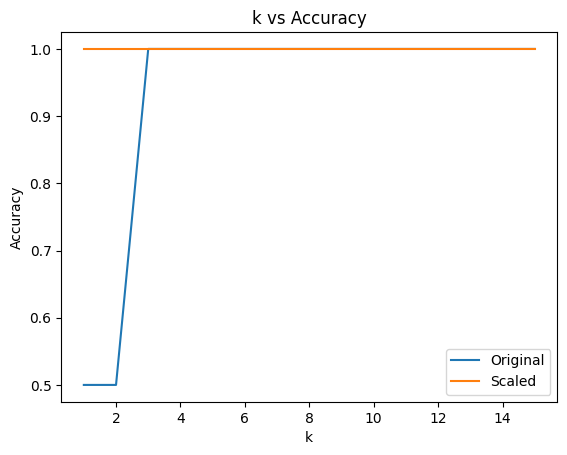

In [ ]:
plt.plot(k_values, acc_original_list, label='Original')
plt.plot(k_values, acc_scaled_list, label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()

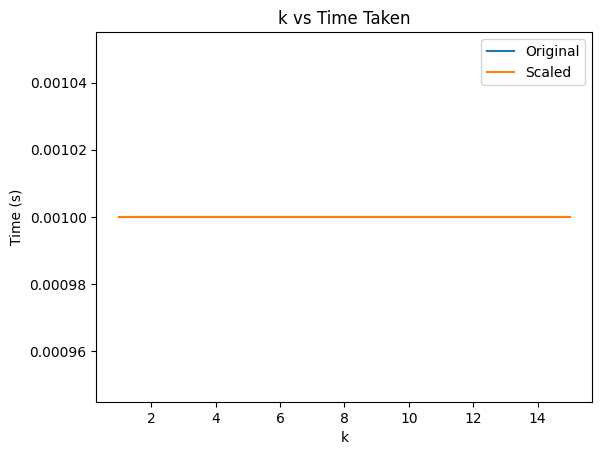

In [ ]:
plt.plot(k_values, time_original_list, label='Original')
plt.plot(k_values, time_scaled_list, label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (s)')
plt.title('k vs Time Taken')
plt.legend()
plt.show()

10.Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In the KNN algorithm, k is the number of the affects the accuracy and computational cost. Selecting k carefully is important as it affects the accuracy of the model.

If the 'k' is lower then it only views at the few neighbours which can  cause errors in the data, while creating small patterns

Where as  on the other hand if the number is too large the model looks at mandy neighbours. This makes it less affected by noise, but it can miss small details and the worng predections can be made at some points.

The computational cost also depends on k and the size of the data. KNN calculates distances to all training points, so more data makes it slower. A slightly bigger k adds a small extra cost for voting.

To choose the best k, we test different values on validation data and pick the one with the highest accuracy. Usually , a moderate k works best, balancing accuracy and speed.